# Lab: GPA

In this lab, you will explore Wade's famous GPA dataset and find out about the easiest, hardest, and most popular courses at Illinois!

The dataset you are using is this lab is actually the same dataset that Prof Wade used to make the GPA visualizations :) Check this out here if you haven't seen it already: [https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/](https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/)

## Group

Edit the next Python cell to add information about who you're working within your lab section:

In [1]:
# First, meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = ""
ca1_name = ""
ca2_name = ""


# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = ""
partner1_netid = ""
partner1_major = ""

partner2_name = ""
partner2_netid = ""
partner2_major = ""

partner3_name = ""
partner3_netid = ""
partner3_major = ""

## Table of Contents <a id='toc'></a>

**Use the Outline view (View > Command Palette > Type "outline") for navigation.**

* Puzzle 1
    * Puzzle 1.1
    * Puzzle 1.2
* Puzzle 2
    * Puzzle 2.1
    * Puzzle 2.2
    * Puzzle 2.3 
    * Puzzle 2.4
* Puzzle 3
    * Puzzle 3.1
    * Puzzle 3.2
    * Puzzle 3.3
    * Puzzle 3.4
    * Puzzle 3.5

## Puzzle 1: Basic Data Manipulation

### Puzzle 1.1: Loading the Dataset

For the first part of our lab, we'll be using the GPA dataset, which should be automatically downloaded when you fetch this notebook. 

In the following cell, load the pandas library and read the dataset into `df`.

In [8]:
#import the gpa.csv dataset below
import pandas as pd
import matplotlib as plt
df = pd.read_csv("gpa.csv")
df.head()

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,12,12,1,0,...,1,0,1,0,0,0,0,1,0,"Boonsripaisal, Simon"
1,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,5,12,4,1,...,1,2,0,0,0,0,0,1,0,"Boonsripaisal, Simon"
2,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,0,8,7,3,...,3,2,0,2,0,0,0,0,0,"Uhall, Michael B"
3,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,8,6,2,0,...,1,1,2,1,0,0,0,0,0,"Uhall, Michael B"
4,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,5,4,3,1,...,1,1,2,1,1,0,1,1,0,"Kang, Yoonjung"


### Puzzle 1.2: Adding Helper Columns

Add two new columns, `"Total Students"` and `"Average GPA"`, that compute the total number of students in each course and the average GPA for each course, respectively.

You should not include students with a `"W"` in either column. The grade point scale can be found at https://registrar.illinois.edu/courses-grades/explanation-of-grades/.

Hint (double-click this cell to see it): <span style="color:#ffffff00">it is not necessary but you can try the dot() function; see https://stackoverflow.com/questions/18419962/how-to-compute-weighted-sum-of-all-elements-in-a-row-in-pandas for some examples.</span>

In [14]:
weight = [4, 4, 3.67, 3.33, 3, 2.67, 2.33, 2, 1.67, 1.33, 1, 0.67, 0]
grade = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"]
df["Total Students"] = df[grade].sum(axis = 1)
df["Average GPA"] =  df[grade].dot(weight)/df["Total Students"]

In [15]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(df[
  (df["YearTerm"] == "2010-su") & \
  (df["Subject"] == "STAT") & \
  (df["Number"] == 410) \
]["Total Students"].sum() == 31), "It appears that your \"Total Students\" column is incorrect."
assert(df[
  (df["YearTerm"] == "2018-fa") & \
  (df["Subject"] == "CS") & \
  (df["Number"] == 225) \
]["Total Students"].sum() == 697), "It appears that your \"Total Students\" column is incorrect."
assert( abs(df[
  (df["YearTerm"] == "2018-fa") & \
  (df["Subject"] == "STAT") & \
  (df["Number"] == 100) \
]["Average GPA"].mean() - 3.247) < 0.01), "It appears that your \"Average GPA\" column is incorrect."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2: Finding the Easiest and Hardest Courses

### Puzzle 2.1: Hardest Courses in the Dataset

Based on the `"Average GPA"` column, find the **30 hardest courses** at Illinois, i.e., the 30 courses with the lowest "Average GPA". Store the results in `df_hard`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the nsmallest() function</span>

In [56]:
df_hard = df.nsmallest(30, "Average GPA")
df_hard

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
9089,2018,Fall,2018-fa,LER,120,Contemporary Labor Problems,0,0,1,2,...,1,2,1,1,0,15,0,"Taylor, Don",28,1.142857
21561,2016,Spring,2016-sp,LER,100,Introduction to Labor Studies,0,1,0,1,...,4,1,1,1,1,10,0,"Hawking, Carol J",24,1.319583
29374,2014,Fall,2014-fa,LER,120,Contemporary Labor Problems,0,4,0,1,...,4,1,0,1,0,15,1,"Hershfield, David",30,1.400000
31642,2014,Spring,2014-sp,LER,120,Contemporary Labor Problems,0,1,3,0,...,3,0,0,0,2,11,0,"Cohen, Margaret L",25,1.427600
34439,2013,Fall,2013-fa,MATH,2,Introductory Algebra,0,0,0,0,...,10,5,3,3,2,5,3,"Aydin-Mullen, Yelda",31,1.430645
31717,2014,Spring,2014-sp,MATH,220,Calculus,0,3,0,0,...,5,0,2,1,0,11,1,"Gilbert, Rebekah A",28,1.476071
6361,2019,Spring,2019-sp,LER,100,Introduction to Labor Studies,0,2,1,2,...,0,0,0,2,1,9,0,"Cohen, Margaret L",21,1.491905
19289,2016,Fall,2016-fa,LER,120,Contemporary Labor Problems,0,2,2,1,...,0,1,2,1,2,8,2,"Hershfield, David",22,1.515455
19557,2016,Fall,2016-fa,MCB,245,Human Anat & Physiol Lab I,0,0,0,0,...,3,4,1,2,0,6,1,"Swigart, James P",23,1.522174
29421,2014,Fall,2014-fa,LLS,296,Bilingual US Latina/o Culture,3,1,0,1,...,1,1,1,0,2,11,1,"Romero, Rolando J",27,1.568519


### Puzzle 2.2: "Level" of Hardest Courses

Find the average `"Number"` of the **30 hardest courses** at Illinois. Store the result as `df_hard_avg`.

In [60]:
df_hard_avg = df_hard["Number"].mean()
df_hard_avg

166.26666666666668

In [61]:
## == TEST CASES for Puzzle 2.1 and 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( math.isclose(df_hard_avg, 4988/30) ), "It appears that your average \"Number\" is incorrect. Please check both Puzzle 2.1 and Puzzle 2.2."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.3: ❓ Individual Reflection Question ❓ Are the Hardest Courses Really "Hard"?

After solving Puzzle 2.1 and 2.2, Joe has the following claim:

"We know that the undergraduate courses are coded from 1 to 499, where a larger number (in the hundreds place) usually implies more advanced materials. Based on Puzzle 2.2, the results in Puzzle 2.1 clearly do not represent the hardest courses at Illinois."

Comment on Joe's claim below.

***Double click this cell and type your answer here.***
The average GPAs are lower for the 100 courses and not lower average GPAs for the higher number courses that usually are considered harder. 

### Puzzle 2.4: Easiest Courses in 2020

Based on the `"Average GPA"` column, find the **30 easiest courses in 2020** at Illinois. Store the results in `df_easy_2020`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the nlargest() function</span>

In [62]:
gpadf = df[df["Year"] == 2020]
df_easy_2020 = gpadf.nlargest(30, "Average GPA")
df_easy_2020

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
240,2020,Spring,2020-sp,ANSC,103,Working With Farm Animals,0,73,0,0,...,0,0,0,0,0,0,0,"Emmert, Jason L",74,3.986486
2196,2020,Summer,2020-su,EPSY,408,Learning & Hum Dev w/ EdTech,79,31,3,1,...,0,0,0,0,0,0,2,"Cope, William",114,3.985439
106,2020,Spring,2020-sp,ACCY,504,Auditing,1,36,0,1,...,0,0,0,0,0,0,0,"Chatterton, Angel",38,3.982368
740,2020,Spring,2020-sp,CS,199,Python for Data,4,26,0,1,...,0,0,0,0,0,0,0,"Silva, Mariana T",31,3.978387
2262,2020,Summer,2020-su,MUS,444,Healthy Music Practices,0,29,0,1,...,0,0,0,0,0,0,0,"Sweet, Bridget M",30,3.977667
375,2020,Spring,2020-sp,BADM,352,Database Design and Management,1,42,0,0,...,0,0,0,0,0,0,0,"Pamuksuz, Utku",44,3.977273
195,2020,Spring,2020-sp,ADV,350,Writing for Public Relations,18,10,0,1,...,0,0,0,0,0,0,0,"Peacock, Marisa C",29,3.976897
810,2020,Spring,2020-sp,ECE,206,Electrical & Electronics Lab,9,19,0,1,...,0,0,0,0,0,0,0,"Radhakrishnan, Chandrasek",29,3.976897
2084,2020,Spring,2020-sp,UP,201,Planning in Action,0,41,0,0,...,0,0,0,0,0,0,0,"Edwards, Mary M",42,3.976190
613,2020,Spring,2020-sp,CI,473,Disciplinary Literacy,0,79,0,0,...,1,0,0,0,0,0,0,"Filkins, Scott R",80,3.975000


In [63]:
## == TEST CASES for Puzzle 2.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
import math
assert( len(df_easy_2020) == 30 ), "You should only have the 30 easiest courses in 2020."
assert( math.isclose(df_easy_2020["Average GPA"].mean(), 3.9730388348773817) ), "Are you sure you have the 30 easiest courses in 2020?"
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3: Finding Data by Subject

### Puzzle 3.1: Total Number of Grades by Subject

Find the total number of each grade (eg: "A+"s, "A"s, "A-"s, etc.) given by different subjects. Store the results in `df_group`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the groupby() and agg() function</span>

In [66]:
df_group = df.groupby("Subject").agg("sum").reset_index()
df_group

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Total Students,Average GPA
0,AAS,360617,23290,771,2094,812,517,526,246,135,140,54,29,29,19,76,24,5448,627.599322
1,ABE,265957,44357,315,2556,800,703,902,240,127,175,46,16,43,6,51,14,5980,460.313666
2,ACCY,4553856,829676,7416,23142,15600,14839,13614,5703,2798,2155,1056,253,662,162,513,255,87913,7645.431230
3,ACE,1777080,241702,3523,13421,5040,4316,6859,2610,1627,2282,770,359,623,214,557,103,42201,2908.949399
4,ACES,286071,16537,889,1838,259,119,272,68,67,79,24,16,26,10,68,6,3735,522.491112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,UP,578226,104655,1063,3559,2037,1241,1358,487,248,293,121,39,74,41,147,39,10708,1001.955127
159,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534
160,VCM,74447,24157,302,1321,29,49,1036,20,18,337,1,1,41,0,1,0,3156,128.099232
161,VM,187402,56460,0,1825,8,0,5861,1,0,3405,0,0,325,0,8,10,11433,263.747696


In [67]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
assert( len(df_group) == 163 ), "Are you sure you grouped by subjects?"
assert( df_group[ df_group["Subject"] == "CS" ]["A"].values[0] == 45290 ), "Are you sure you counted the right number of each subject?"
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.2: Average GPA by Subject

In `df_group`, add a new column called `"Overall Average GPA"` that computes the overall GPA of each subject at Illinois.

In [72]:
df_group["Overall Average GPA"] =  df_group[grade].dot(weight)/df_group["Total Students"]
df_group

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Total Students,Average GPA,Overall Average GPA
0,AAS,360617,23290,771,2094,812,517,526,246,135,140,54,29,29,19,76,24,5448,627.599322,3.517162
1,ABE,265957,44357,315,2556,800,703,902,240,127,175,46,16,43,6,51,14,5980,460.313666,3.494786
2,ACCY,4553856,829676,7416,23142,15600,14839,13614,5703,2798,2155,1056,253,662,162,513,255,87913,7645.431230,3.397299
3,ACE,1777080,241702,3523,13421,5040,4316,6859,2610,1627,2282,770,359,623,214,557,103,42201,2908.949399,3.295548
4,ACES,286071,16537,889,1838,259,119,272,68,67,79,24,16,26,10,68,6,3735,522.491112,3.657438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,UP,578226,104655,1063,3559,2037,1241,1358,487,248,293,121,39,74,41,147,39,10708,1001.955127,3.454414
159,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534,3.448760
160,VCM,74447,24157,302,1321,29,49,1036,20,18,337,1,1,41,0,1,0,3156,128.099232,3.384962
161,VM,187402,56460,0,1825,8,0,5861,1,0,3405,0,0,325,0,8,10,11433,263.747696,2.803291


In [73]:
## == TEST CASES for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
import math
assert( math.isclose(df_group[df_group["Subject"] == "CS"]["Overall Average GPA"].values[0], 3.2788726192300266) ), "Your overall average GPA does not appear to be correct."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.3: Visualizing the Grades of Subject Equal to `"STAT"`

Plot a density histogram of the grades (`"A+"` to `"F"`) for the subject `"STAT"`.

Hint (double-click this cell to see it): 
<span style="color:#ffffff00">
    First, extract the row where the subject is "STAT".
    Then, extract the columns "A+" to "F" and divide them by the total number of students.
    Finally, use plot.bar().
</span>

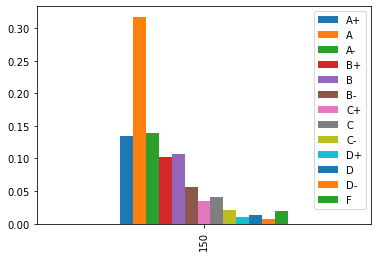

In [83]:
stat = df_group[df_group["Subject"] == "STAT"]
a = stat[grade]/ stat["Total Students"].values[0]
a.plot.bar()

### Puzzle 3.4: ❓ Individual Reflection Question ❓ 

Density Histogram vs. Frequency Histogram

Why should we use density histogram in Puzzle 3.3? Is it meaningful to compare the frequency histogram between different subjects?

***Double click this cell and type your answer here.***
The density histogram will allow us to see which grade has the highest percentage of students. Where frequency shows instances. We divided by total students is why its not frequency. 

### Puzzle 3.5: Find Your Major

Finally, find your major/subject in the dataset and check out how hard it is! 

Feel free to look around and explore! Part of being a data scientist is being creative and using Python to answer questions that you have.  Write your code below and write comments in Puzzle 3.6 to explain what your code does. For example, what are the hardest classes in your major that have had at least 50 students?

In [122]:
# Feel free to explore. Credit will be given as long as you try some new code (i.e., not directly copied from any puzzles).
econ = df[(df["Subject"] == "ECON") & (df["Year"] == 2020) & (df["Total Students"] < 100)]
econW = econ.nlargest(5,"W")
econW

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
2177,2020,Summer,2020-su,ECON,202,Economic Statistics I,1,8,0,5,...,7,1,1,1,0,1,6,"Schultz, Colleen",33,2.807273
2180,2020,Summer,2020-su,ECON,303,Inter Macroeconomic Theory,4,14,8,5,...,2,9,0,0,0,5,2,"McDermott, Eric M",62,2.903871
2183,2020,Summer,2020-su,ECON,437,Game Theory,2,11,11,6,...,6,5,0,1,1,0,2,"Armendariz Buau, Ramses Y",59,3.051356
2175,2020,Summer,2020-su,ECON,102,Microeconomic Principles,0,94,0,0,...,0,0,0,1,0,3,1,"Vazquez, Jose J",99,3.838384
2178,2020,Summer,2020-su,ECON,203,Economic Statistics II,19,8,5,7,...,15,5,0,0,2,13,1,"Armendariz Buau, Ramses Y",87,2.590230


### Puzzle 3.6: ❓ Individual Reflection Question ❓ 

Explain what you did in Puzzle 3.5 here, as well as what you found!  This is your chance to interpret your results and teach us something that you found interesting :)

***Double click this cell and type your answer here.***
I looked for the classes with the most Withdraws in Economics in the latest year of the data set and was suprised to find that the courses with the highest withdraws were during the Summer time. The data was used on smaller classes so only classes with less than 100 students. Only one of them was a 400 level course was also interesting. 

# Finale!

You're almost done -- congratulations!

You need to do two more things:

1.  Save your work. To do this, go to File -> Save All

2.  After you have saved, exit this notebook and follow the webpage instructions to commit this lab to your Git repository!